In [1]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('data.csv')
data.head()


,_id,Ár,Leikskóli,0-1 árs,2 ára,3 ára,4 ára,5 ára,Alls,Fjöldi deilda,Meðalfjöldi á deild,Tegund,Borgarhluti 4,Borgarhluti 5,Borgarhluti 10,Miðstöð
0,1,2009,Arnarborg,0.0,15.0,12.0,21.0,16.0,64,3,"21,3",Almennir,Breiðholt,Breiðholt,Breiðholt,Breiðholt
1,2,2009,Austurborg,10.0,17.0,30.0,21.0,13.0,91,4,"22,8",Almennir,"Laugardalur, Háaleiti, Bústaðir","Laugardalur, Háaleiti, Bústaðir",Háaleiti-Bústaðir,Norðurmiðstöð
2,3,2009,Álftaborg,4.0,24.0,26.0,21.0,13.0,88,4,"22,0",Almennir,"Laugardalur, Háaleiti, Bústaðir","Laugardalur, Háaleiti, Bústaðir",Háaleiti-Bústaðir,Norðurmiðstöð
3,4,2009,Árborg,2.0,19.0,16.0,12.0,14.0,63,3,"21,0",Almennir,"Árbær, Grafarholt, Norðlingaholt, Úlfarsárdalu...","Árbær, Grafarholt, Norðlingaholt, Úlfarsárdalur",Árbær,Austurmiðstöð
4,5,2009,Ásborg,9.0,35.0,22.0,30.0,24.0,120,6,"20,0",Almennir,"Laugardalur, Háaleiti, Bústaðir","Laugardalur, Háaleiti, Bústaðir",Laugardalur,Norðurmiðstöð


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


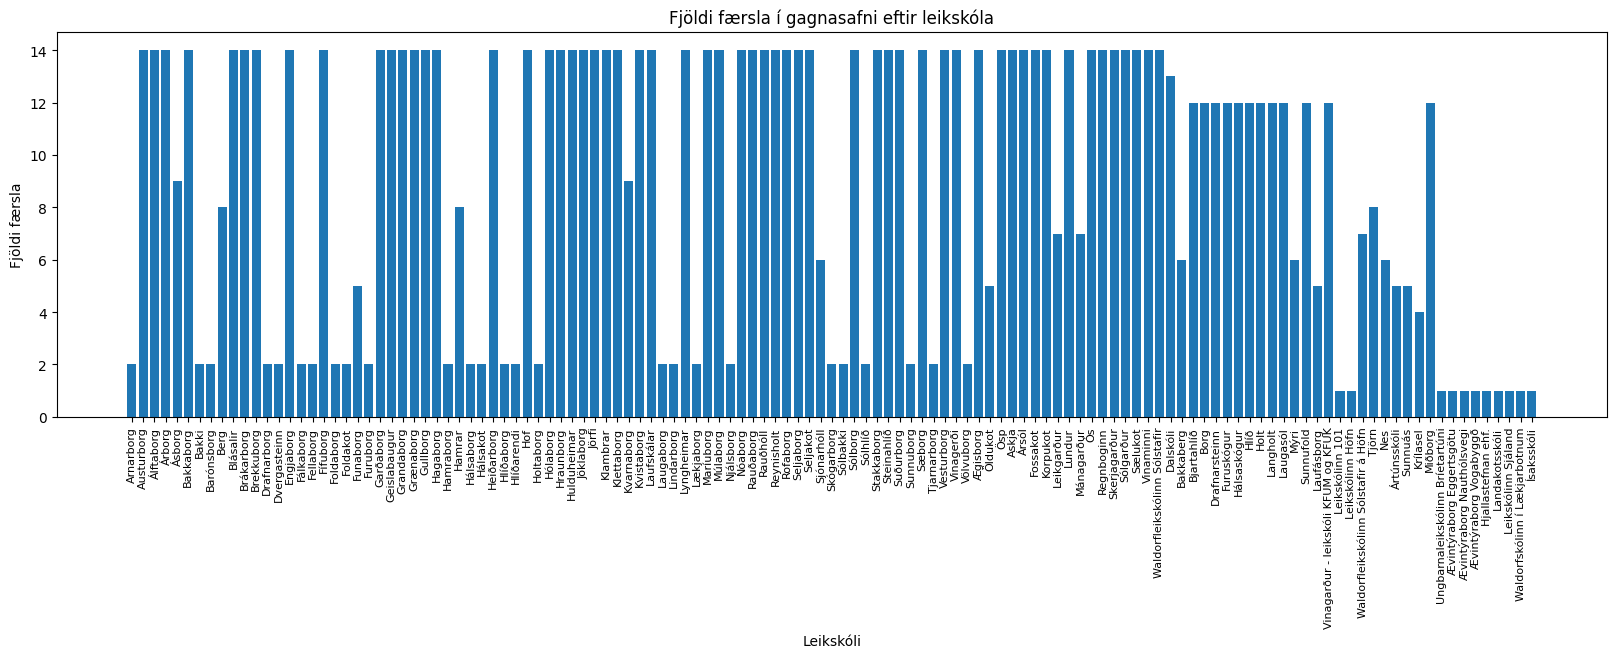

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# get unique leikskoli
kindergardens = data['Leikskóli'].unique()

kindergarden_name = []
kindergarden_amount_of_entries = []

for kindergarden in kindergardens:
    data_k = data[data['Leikskóli'] == kindergarden]
    data_k = data_k.sort_values(by=['Ár'])
    data_k = data_k.reset_index(drop=True)
    
    kindergarden_name.append(data_k['Leikskóli'][0])
    kindergarden_amount_of_entries.append(len(data_k))

# histogram
plt.figure(figsize=(20, 5))
plt.bar(kindergarden_name, kindergarden_amount_of_entries)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Leikskóli')
plt.ylabel('Fjöldi færsla')
plt.title('Fjöldi færsla í gagnasafni eftir leikskóla')
plt.show()

In [3]:

# index of the kindergarden with the entries > 10
kindergarden_index = [i for i in range(len(kindergarden_amount_of_entries)) if kindergarden_amount_of_entries[i] > 10]

# get the kindergarden names with the entries > 10
_kindergarden_name = [kindergarden_name[i] for i in kindergarden_index]
cleaned_data = data[data['Leikskóli'].isin(_kindergarden_name)]

In [4]:
import os

# get unique leikskoli
kindergardens = cleaned_data['Leikskóli'].unique()

save_folder = 'plots/polynomial_fit/'

if not os.path.exists(save_folder):
    os.makedirs(save_folder)

for kindergarden in kindergardens:
    data_k = cleaned_data[cleaned_data['Leikskóli'] == kindergarden]
    data_k = data_k.sort_values(by=['Ár'])
    data_k = data_k.reset_index(drop=True)
    
    # polynomial line of best fit (degree 2 for a quadratic fit)
    z = np.polyfit(data_k['Ár'], data_k['Alls'], 4)
    p = np.poly1d(z)  # creates a polynomial function p from the coefficients in z

    plt.figure(figsize=(5, 5))
    plt.scatter(data_k['Ár'], data_k['Alls'])  # scatter plot of the data
    plt.plot(data_k['Ár'], p(data_k['Ár']), "r--")  # plot the polynomial curve
    plt.legend(['Fjöldi leikskólabarna', 'Best fit'])
    plt.xlabel('Ár')
    plt.ylabel('fjöldi leikskólabarna')
    plt.title(f"Fjöldi leikskólabarna í {kindergarden}")
    plt.savefig(f"{save_folder}{kindergarden}.png")
    plt.close()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import os

save_folder = 'plots/neural_network/'
n_future_years = 5  # Number of years you want to predict into the future

if not os.path.exists(save_folder):
    os.makedirs(save_folder)

for kindergarden in kindergardens:
    data_k = cleaned_data[cleaned_data['Leikskóli'] == kindergarden]
    data_k = data_k.sort_values(by=['Ár'])
    data_k = data_k.reset_index(drop=True)

    original_years = data_k['Ár'].copy()
    future_years = np.arange(original_years.max() + 1, original_years.max() + 1 + n_future_years)

    # standardize the data
    scaler = StandardScaler()
    scaled_years = scaler.fit_transform(original_years.values.reshape(-1, 1))
    scaled_future_years = scaler.transform(future_years.reshape(-1, 1))

    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(scaled_years, data_k['Alls'], test_size=0.2, shuffle=False, random_state=42)

    # model = XGBRegressor(max_depth=3, n_estimators=70, subsample=0.5, random_state=42)
    # model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
    # model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=1000, random_state=42)
    model = MLPRegressor(hidden_layer_sizes=(32, 32),activation="relu", max_iter=2000, random_state=42)
    model.fit(X_train, y_train)
    print(f"Model score for {kindergarden}: {model.score(X_test, y_test)}")

    # Predictions for existing and future years
    existing_predictions = model.predict(np.concatenate((X_train, X_test)).reshape(-1, 1))
    future_predictions = model.predict(scaled_future_years)

    all_years = np.concatenate((original_years, future_years))
    all_predictions = np.concatenate((existing_predictions, future_predictions))

    # Plot
    plt.figure(figsize=(5, 5))
    plt.scatter(original_years, data_k['Alls'])  # Actual data points
    plt.plot(all_years, all_predictions, "r--")  # Predictions including future
    plt.title(f"Prediction and Future Projection for {kindergarden}")
    plt.xlabel('Ár')
    plt.ylabel('Alls')
    plt.xticks(np.arange(min(all_years), max(all_years)+1, 3))  # Set x-ticks to show every year as an integer
    plt.legend(['Predictions', 'Actual Data'])
    plt.savefig(f"{save_folder}{kindergarden}_prediction.png")
    plt.close()

    # break  # Remove this to plot for all kindergartens

/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Austurborg: -71.06760928284088


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Álftaborg: -212.0410721524534


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Árborg: -8.021207072912544


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Bakkaborg: -45.222862673938224


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Blásalir: -0.5678462408676057


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Brákarborg: -0.04661204661178764


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Brekkuborg: -2.5748217954465966


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Engjaborg: -16.29098423747127


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Fífuborg: -158.38557728804528
Model score for Garðaborg: -11.792426104441857


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Geislabaugur: -6.127990532704455


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Grandaborg: -0.3939195106118809
Model score for Grænaborg: -13.328471334752681


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Gullborg: 0.19186709374115596


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Hagaborg: -8.885044737493644


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Heiðarborg: -8.475700278866354


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Hof: -17.362961592152914


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Hólaborg: -19.58285304808649


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Hraunborg: -1.1238689701693598


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Hulduheimar: -0.5856441233513148


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Jöklaborg: 0.1519804029207683


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Jörfi: -76.59054197917669


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Klambrar: -9.246173428171852


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Klettaborg: -600.175720940216


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Kvistaborg: -5.113588049585079


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Laufskálar: -36.62214514780176


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Lyngheimar: -474.2411236134111


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Maríuborg: -14.624268720558272


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Múlaborg: -1.5223744702838107


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Nóaborg: -7.824116737285811
Model score for Rauðaborg: -23.59213554555483


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Rauðhóll: -7.960870506122308


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Reynisholt: -213.08063419650497


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Rofaborg: -31.410040238014908


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Seljaborg: -455.5662138016441


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Seljakot: -0.03694581511370476


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Sólborg: -0.8852091947263292


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Stakkaborg: -11.372870584341157


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Steinahlíð: -2.048247670879887


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Suðurborg: -3.24797724369052


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Sæborg: -28.607957027323916


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Vesturborg: -0.29005990233582546


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Vinagerði: -28.91719854404453


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Ægisborg: -0.5348383871032407


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Ösp: -2.8418604357896475


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Askja: -0.7151020210067662


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Ársól: -2.6145762221214683


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Fossakot: -0.9912302722140747


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Korpukot: -0.13866409624384857
Model score for Lundur: -22.50689499966957


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Ós: -371.8846564594284


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Regnboginn: -8.381986155686587


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Skerjagarður: -13.8919961745523


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Sólgarður: -1.1539777948116003


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Sælukot: -6.3940300381975765


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Vinaminni: -43.07910660202547


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Waldorfleikskólinn Sólstafir: -110.58385343617361


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Dalskóli: -13.851238325733446


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Bjartahlíð: -131.17820943964463


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Borg: -37.139363905815806


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Drafnarsteinn: -11.022368038824904


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Furuskógur: -5.357742894454466


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Hálsaskógur: -49.57608707340611


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Hlíð: 0.03180873184882249


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Holt: -2.71930980114792


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Langholt: -212.38974751750658


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Laugasól: -3.0851598801670956


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Sunnufold: -972.1520707136386


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score for Vinagarður - leikskóli KFUM og KFUK: -13.010679524243345
Model score for Miðborg: -0.6719604264288954


/Users/haukurbirgisson/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
